In [129]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [130]:
# Load data from the data.csv to panda's dataframe

share_bike_df = pd.read_csv('day.csv')

share_bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [131]:
share_bike_df.shape

(730, 16)

#### Observation:- As the output suggests, original dataset has 730 rows and 16 columns

In [132]:
share_bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data cleanup

### Dropping unwanted columns

#### From the data dictionary provided (Readme.txt), below points are very clear:-
    1. instant column is index column
    2. casual and registered sum up to the target variable "cnt"
    3. dte is the date for which the records are provided. At the same time we have yr, mnth columns provided. So dte becomes redundant.

We will first begin with dropping these columns:- instant, casual, registered, dte

In [133]:
share_bike_df.drop(['instant', 'casual', 'registered', 'dteday'], axis=1, inplace=True)

print(share_bike_df.columns)
print(share_bike_df.shape)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')
(730, 12)


#### Observation:- The above output confirms that there are now only 12 columns left & instant, casual, registered, dteday are not present.

### Checking for null values

In [134]:
share_bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### Observation:- There are no null values.

### Processing Categorical values

#### From the data dictionary provided, we can conclude below:-

    1. season column contains numeric values but they actually represent spring, summer, fall, winter
    2. mnth column contains numeric values from 1 to 12 representing months from Jan to Dec
    3. weekday column contains numeric values representing day of the week: mon, tue, wed...
    4. weathersit column contains numeric values to represent weather condition


We need to convert these columns to category type.

In [135]:
# Replacing numeric values with categorical values

share_bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

share_bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)

share_bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)

share_bike_df.weathersit.replace({1:'clear',2:'mist',3:'rain',4:'snow'},inplace = True)


In [136]:
# Converting columns to category type

share_bike_df['season'] = share_bike_df['season'].astype('category')
share_bike_df['mnth'] = share_bike_df['mnth'].astype('category')
share_bike_df['weekday'] = share_bike_df['weekday'].astype('category')
share_bike_df['weathersit'] = share_bike_df['weathersit'].astype('category')
share_bike_df['yr'] = share_bike_df['yr'].astype('category')
share_bike_df['holiday'] = share_bike_df['holiday'].astype('category')
share_bike_df['workingday'] = share_bike_df['workingday'].astype('category')

share_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


#### Observation
Dtype has been set correctly for all the columns

### Removing duplicates

In [137]:
# Performing the drop_duplicates operation.

share_bike_df.drop_duplicates(subset=None, inplace=True)
share_bike_df.shape

(730, 12)

#### Observation
There still are 730 rows and 12 columns, this indicates there were no duplicates.

### Outlier Treatment

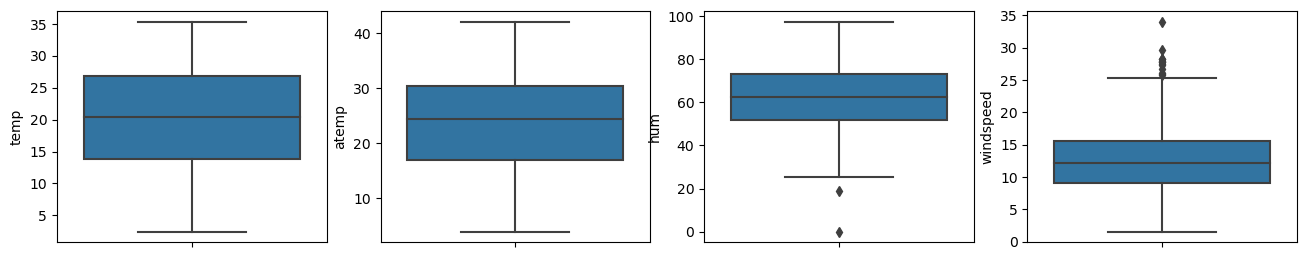

In [138]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(16,3))

i = 1
for col in numeric_cols:
    plt.subplot(1, 4,i)
    sns.boxplot(y=col, data=share_bike_df)
    i += 1

#### Observation
Outliers are not a problem for the given dataset.

## Exploratory Data Analysis

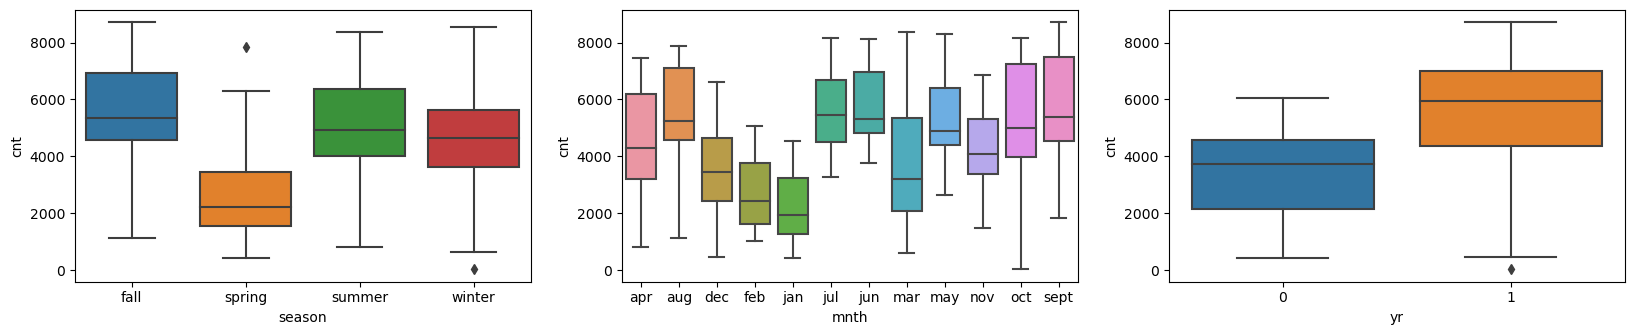

In [139]:
# Plotting bike demand against months, seasons, years

cols_for_plot = ['season', 'mnth', 'yr']
plt.figure(figsize=(20, 12))
for i in enumerate(cols_for_plot):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(data=share_bike_df, x=i[1], y='cnt')
plt.show()

#### Observation

1. Spring season has the least demand.
2. Fall and summer sees more demand followed by winter.
3. Month of Jun, Jul, Aug, Oct, Sept have more demand compared to other months. The demand for bike is very low in the month of jan, which improves slightly in the month of feb.
4. 2nd year has higher demand than the previous year.

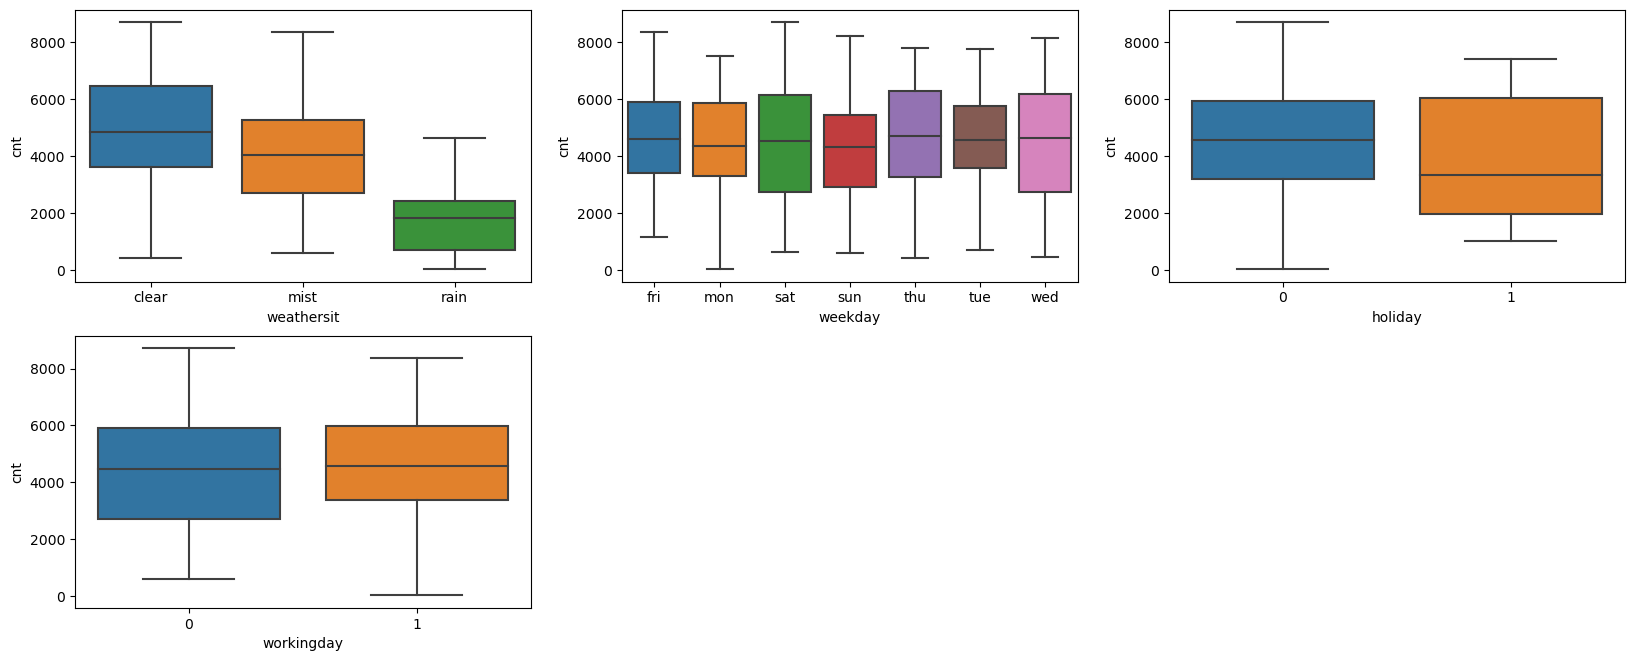

In [140]:
#Plotting bike demand against weather situation, weekday, holiday

cols_for_plot = ['weathersit','weekday', 'holiday', 'workingday']

plt.figure(figsize=(20, 12))
for i in enumerate(cols_for_plot):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(data=share_bike_df, x=i[1], y='cnt')
plt.show()

#### Observation:-
1. Good/clear weather situation sees higher demand.
2. The least demand for bike is on Sunday.
3. Holiday & workingday do not have much impact. They do map to the same information afterall, don't they.

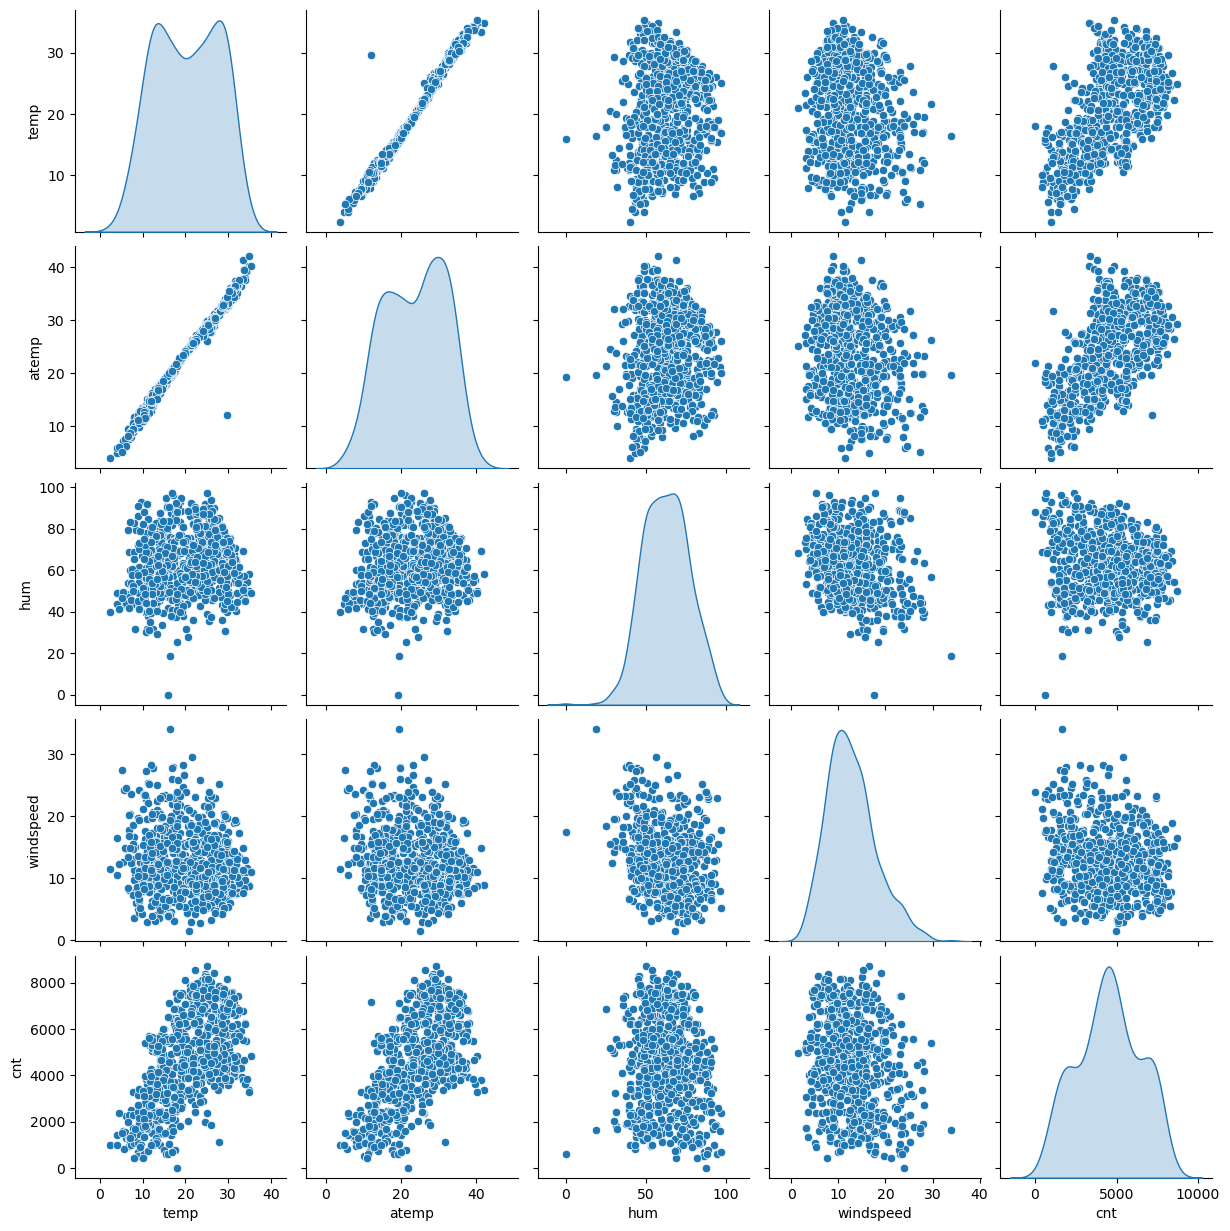

In [141]:
# Drawing pairplot for numeric columns

sns.pairplot(data =share_bike_df, vars=[ 'temp', 'atemp', 'hum', 'windspeed','cnt'], diag_kind='kde')
plt.show()

#### Observation:- The above Pair-Plot shows strong linear relation among 'temp','atemp' and 'cnt'

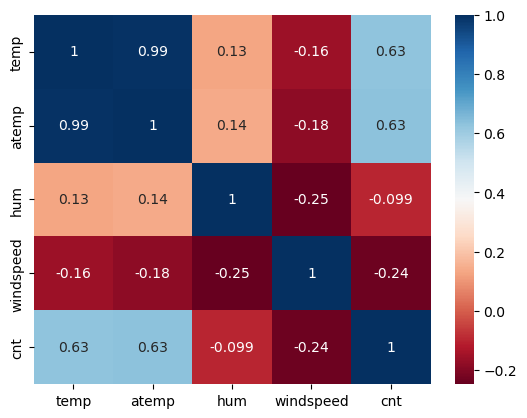

In [142]:
# Visualizing correlation among numeric columns

sns.heatmap(share_bike_df[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(), cmap='RdBu', annot = True)
plt.show()

#### Observation:-

1. temp & atemp has strong positive correlation ~1.
2. temp  & atemp has positive correlation with cnt.
3. temp & atemp have negative correlation with windspeed & hum.
5. windspeed & hum are showing negative correlation with cnt.

### Creating dummy variables

In [143]:
# Creating dummy variables

share_bike_df = pd.get_dummies(data=share_bike_df,columns=["season"],drop_first=True, dtype=int)
share_bike_df = pd.get_dummies(data=share_bike_df,columns=["mnth"],drop_first=True, dtype=int)
share_bike_df = pd.get_dummies(data=share_bike_df,columns=["weekday"],drop_first=True, dtype=int)
share_bike_df = pd.get_dummies(data=share_bike_df,columns=["weathersit"],drop_first=True, dtype=int)

share_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   yr               730 non-null    category
 1   holiday          730 non-null    category
 2   workingday       730 non-null    category
 3   temp             730 non-null    float64 
 4   atemp            730 non-null    float64 
 5   hum              730 non-null    float64 
 6   windspeed        730 non-null    float64 
 7   cnt              730 non-null    int64   
 8   season_spring    730 non-null    int64   
 9   season_summer    730 non-null    int64   
 10  season_winter    730 non-null    int64   
 11  mnth_aug         730 non-null    int64   
 12  mnth_dec         730 non-null    int64   
 13  mnth_feb         730 non-null    int64   
 14  mnth_jan         730 non-null    int64   
 15  mnth_jul         730 non-null    int64   
 16  mnth_jun         730 non-null    int64   
 1

#### Observation:- Dummy variables created for mnth, season, weekday, weathersit. Now there are 30 columns in the dataframe.

### Finding correlation among all the features

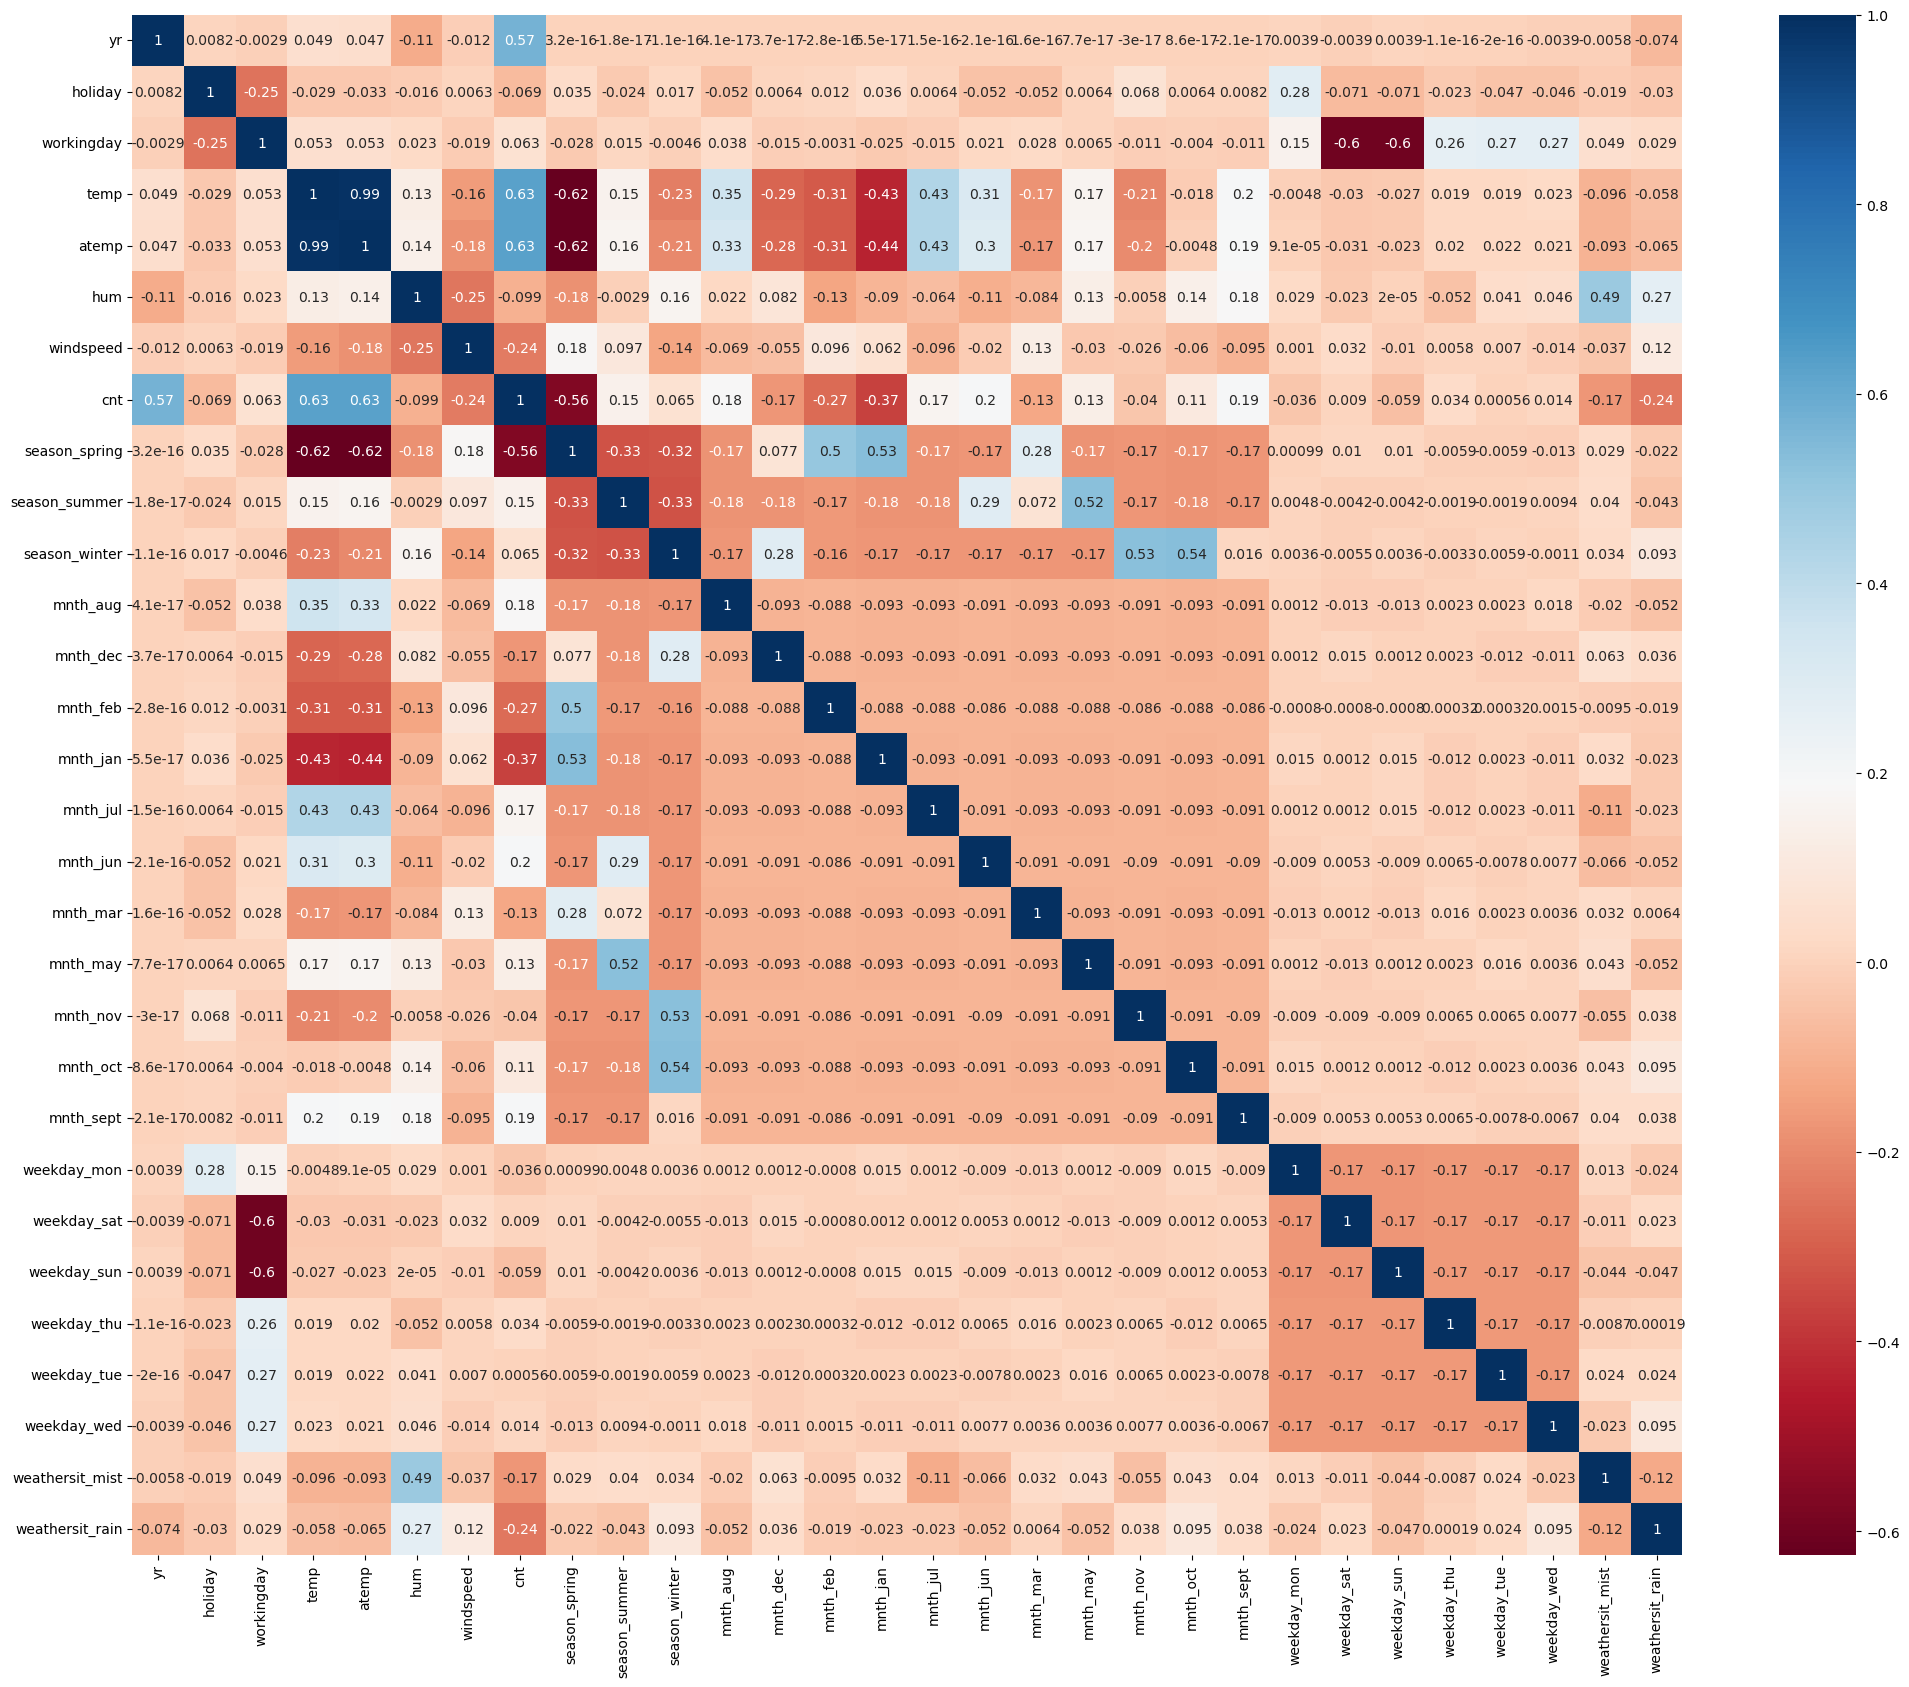

In [144]:
# Drawing heatmap
plt.figure(figsize = (25,20))
sns.heatmap(share_bike_df.corr(), annot = True, cmap="RdBu")
plt.show()

#### Observation

1. Target variable cnt has positive correlation with yr, temp, atemp.
2. Target variable cnt has negative correlation with windspeed, spring_summer, mnth_feb, mnth_jan, weathersit_mist, weathersit_rain.
3. Other variables also have correlation with each other, for example, workingday and weekday_sat, weekday_sun have strong negative correlation (which is kind of obvious).

## Building Models

We will be building linear regression models. First we will build a model using manual approach. We will start with all the features, and then manully eliminate the insignificant features one by one.

Later, we will also employ the Recursive Feature Elimination (RFE) approach to build our models.

### Creating training and test datasets

In [145]:
share_bike_train, share_bike_test = train_test_split(share_bike_df, train_size=0.7, random_state = 100)
print(share_bike_train.shape)
print(share_bike_test.shape)

(510, 30)
(220, 30)


In [146]:
### Rescaling data usin Min-Max scaling

In [147]:
cols_to_rescale = ['temp', 'atemp', 'hum', 'windspeed','cnt']

scaler = MinMaxScaler()

share_bike_train[cols_to_rescale] = scaler.fit_transform(share_bike_train[cols_to_rescale])
share_bike_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation:- The min value is 0.0 and max value is 1.0.

### Defining common functions for reusability

In [148]:
def calculateVIF (X_arg):
    vif_df = pd.DataFrame()
    vif_df['features'] = X_arg.columns
    vif_df['vif'] = [variance_inflation_factor(X_arg.values, i) for i in range(X_arg.shape[1])]
    vif_df['vif'] = round(vif_df['vif'], 2)
    vif_df = vif_df.sort_values(by = 'vif', ascending = False)
    return vif_df

def createRegressionModel(X_arg, y_arg):
    # adding constant
    X_arg_sm = sm.add_constant(X_arg)
    
    #create linear regression model using OLS
    lr = sm.OLS(y_arg, X_arg_sm)
    lr_model = lr.fit()
    return lr_model

### 1st Model including all the features

In [149]:
y_train = share_bike_train.pop('cnt')
X_train = share_bike_train

In [150]:
linear_model = createRegressionModel(X_train, y_train)
print(linear_model.summary())
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.81e-180
Time:                        11:25:58   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2433      0.035     

,features,vif
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
22,weekday_sat,19.71
23,weekday_sun,18.34
7,season_spring,10.77
9,season_winter,9.46
8,season_summer,8.29
18,mnth_nov,6.79
10,mnth_aug,6.47


#### Observation
1. Very High VIF for few predictors such as workingday, temp, weekday_sat, weekday_sun
2. Very High p-value for atemp, mnth_oct, mnth_mar, mnth_jun, weekday_wed, weekday_sun, weekday_thu

We will drop mnth_oct and proceed as it has both high p-value and VIF

### 2nd Model after dropping mnth_oct

In [151]:
X_train_new = X_train.drop(['mnth_oct'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.80e-181
Time:                        11:25:58   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2459      0.033     

,features,vif
2,workingday,76.10
3,temp,66.90
4,atemp,56.02
21,weekday_sat,17.49
22,weekday_sun,16.31
7,season_spring,10.77
9,season_winter,7.20
8,season_summer,6.84
10,mnth_aug,4.97
14,mnth_jul,4.45


#### Observation
1. High p-value for multiple features.
2. High VIF for multiple features.

atemp has both high p-value and high VIF, so we will drop atemp.

### 3rd Model after dropping atemp

In [152]:
X_train_new = X_train_new.drop(['atemp'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.93e-182
Time:                        11:25:58   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2456      0.033     

,features,vif
2,workingday,76.07
20,weekday_sat,17.49
21,weekday_sun,16.31
6,season_spring,10.75
8,season_winter,7.18
3,temp,7.08
7,season_summer,6.81
9,mnth_aug,4.86
13,mnth_jul,4.42
12,mnth_jan,4.37


#### Observation
1. VIF for temp has dropped down significantly, though it is still greater than 5.
2. p-value is still very high for a few features.

We will select mnth_mar for this iteration as it's p-value is the highest: 0.947

### 4th Model after dropping mnth_mar

In [153]:
X_train_new = X_train_new.drop(['mnth_mar'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.74e-183
Time:                        11:25:59   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2452      0.032     

,features,vif
2,workingday,72.24
19,weekday_sat,16.60
20,weekday_sun,15.58
6,season_spring,9.25
8,season_winter,7.12
3,temp,6.87
7,season_summer,6.81
9,mnth_aug,4.80
13,mnth_jul,4.39
1,holiday,3.96


#### Observation
1. There still are 7 features with high VIF. Among them workingday has massive VIF of 72.24
2. There are multiple features with high p-values as well.

We will drop mnth_jun as it's p-value is very high: 0.896

### 5th Model after dropping mnth_jun

In [154]:
X_train_new = X_train_new.drop(['mnth_jun'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.53e-184
Time:                        11:25:59   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2453      0.032     

,features,vif
2,workingday,72.11
18,weekday_sat,16.55
19,weekday_sun,15.54
6,season_spring,8.55
7,season_summer,6.60
8,season_winter,6.27
3,temp,4.92
1,holiday,3.96
9,mnth_aug,3.17
13,mnth_jul,2.81


#### Observation
1. temp VIF has falled down below 5.
2. There is not much drop in workingday's VIF.

We will drop weekday_wed in this iteration due to its significantly high p-value.

### 6th Model after dropping weekday_wed

In [155]:
X_train_new = X_train_new.drop(['weekday_wed'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.42e-185
Time:                        11:25:59   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2447      0.032     

,features,vif
2,workingday,70.18
18,weekday_sat,16.52
19,weekday_sun,15.51
6,season_spring,8.55
7,season_summer,6.60
8,season_winter,6.27
3,temp,4.92
1,holiday,3.91
9,mnth_aug,3.17
13,mnth_jul,2.81


#### Observation
1. There are 8-10 features with high p-values.
2. There are still 6 features with high VIFs.

We will drop holiday and build another model.

### 7th Model after dropping holiday

In [156]:
X_train_new = X_train_new.drop(['holiday'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.42e-185
Time:                        11:25:59   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2539      0.048     

,features,vif
3,hum,36.38
2,temp,24.25
1,workingday,20.83
5,season_spring,8.39
6,season_summer,6.70
7,season_winter,6.69
17,weekday_sat,5.91
18,weekday_sun,5.58
4,windspeed,5.13
8,mnth_aug,3.26


#### Observation
1. workingday VIF has falled drastically.
2. temp and hum VIf has increased dramatically.
3. Now there are more number of features with VIF > 5.

weekday_thu has p-value of 0.64, so it will be dropped and another model will be created. 

### 8th Model after dropping weekday_thu

In [157]:
X_train_new = X_train_new.drop(['weekday_thu'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.36e-186
Time:                        11:25:59   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2512      0.048     

,features,vif
3,hum,36.34
2,temp,24.14
1,workingday,20.80
5,season_spring,8.36
6,season_summer,6.68
7,season_winter,6.68
17,weekday_sat,5.81
18,weekday_sun,5.49
4,windspeed,5.12
8,mnth_aug,3.26


#### Observation
1. Not much decrease in the VIFs of hum, temp, workingday, etc.

Dropping mnth_aug and building the next model

### 9th Model after dropping mnth_aug

In [158]:
X_train_new = X_train_new.drop(['mnth_aug'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.47e-187
Time:                        11:25:59   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2594      0.046     

,features,vif
3,hum,35.48
2,temp,22.61
1,workingday,19.86
5,season_spring,6.09
16,weekday_sat,5.52
17,weekday_sun,5.30
4,windspeed,5.09
7,season_winter,4.45
6,season_summer,3.76
10,mnth_jan,2.43


#### Observation
1. No noticable change in the VIFs of hum, temp, workingday.
2. There are also 6 items with p-values > 0.05

Selecting weekday_tue for elimination on the basis of high p-value.

### 10th Model after dropping weekday_tue

In [159]:
X_train_new = X_train_new.drop(['weekday_tue'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          3.51e-188
Time:                        11:25:59   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2580      0.046     

,features,vif
3,hum,35.40
2,temp,22.60
1,workingday,19.79
5,season_spring,6.09
16,weekday_sat,5.49
17,weekday_sun,5.26
4,windspeed,5.09
7,season_winter,4.45
6,season_summer,3.75
10,mnth_jan,2.43


#### Observation
1. No noticable change in VIFs.
2. weekday_mon will be dropped and a new model will be created.

### 11th Model after dropping weekday_mon

In [160]:
X_train_new = X_train_new.drop(['weekday_mon'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          5.20e-189
Time:                        11:26:00   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2478      0.045     

,features,vif
3,hum,34.75
2,temp,22.48
1,workingday,19.11
5,season_spring,6.06
15,weekday_sat,5.10
4,windspeed,5.06
16,weekday_sun,4.89
7,season_winter,4.40
6,season_summer,3.71
10,mnth_jan,2.42


#### Observation
1. We still have 6 items with > 5 VIFs.

Dropping mnth_may and reiterating model building process.

### 12th Model after dropping mnth_may

In [161]:
X_train_new = X_train_new.drop(['mnth_may'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          9.80e-190
Time:                        11:26:00   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2368      0.045     

,features,vif
3,hum,34.64
2,temp,22.30
1,workingday,18.92
5,season_spring,6.05
14,weekday_sat,5.04
4,windspeed,4.99
15,weekday_sun,4.85
7,season_winter,4.40
6,season_summer,3.11
10,mnth_jan,2.42


#### Observation
1. mnth_feb will be dropped and another model will be created as its p-value is 0.119 which is the highest among all other features.

### 13th Model after dropping mnth_feb

In [162]:
X_train_new = X_train_new.drop(['mnth_feb'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.52e-190
Time:                        11:26:00   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2235      0.044     

,features,vif
3,hum,34.19
2,temp,21.56
1,workingday,18.84
5,season_spring,5.06
13,weekday_sat,5.03
4,windspeed,4.99
14,weekday_sun,4.83
7,season_winter,4.40
6,season_summer,3.09
15,weathersit_mist,2.35


#### Observation
1. Only weekday_sun has p-value > 0.5. We will drop it and then if no other feature is left with high p-value, we will eliminate features on the basis of high VIF.

### 14th Model after dropping weekday_sun

In [163]:
X_train_new = X_train_new.drop(['weekday_sun'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          1.20e-190
Time:                        11:26:00   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2690      0.037     

,features,vif
3,hum,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
5,season_spring,4.50
7,season_winter,4.11
6,season_summer,2.88
14,weathersit_mist,2.32
0,yr,2.09
13,weekday_sat,1.86


#### Observation
1. Only 2 elements have high VIF. Rest all the features have < 5 VIF.
2. All p-values are less than 0.05

We will pick hum and drop it as it has the highest VIF.

### 15th Model after dropping hum

In [164]:
X_train_new = X_train_new.drop(['hum'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          1.84e-188
Time:                        11:26:00   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1985      0.033     

,features,vif
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
4,season_spring,3.09
6,season_winter,3.03
5,season_summer,2.33
0,yr,2.08
12,weekday_sat,1.86
10,mnth_nov,1.79
8,mnth_jan,1.67


#### Observation
1. VIF for temp has come down to 6.92 from 18.94.

Now there is no feature with high p-value. temp has strong correlation with target variable. So we don't want to drop it, though it has high VIF. workingday has slightly less VIF. We have also seen that workingday has a correlation of 0.063 with the target variable. We will drop workingday and build the next model. We will gauge the values of F-statistics, R-squared score, Prob (F-statistic), p-values, VIFs etc. If all the indicators suggest that the model is still relevant and significant we will adopt it and proceed further.

### 16th Model after dropping workingday

In [165]:
X_train_new = X_train_new.drop(['workingday'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.9
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.61e-184
Time:                        11:26:00   Log-Likelihood:                 500.71
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     495   BIC:                            -907.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2424      0.032     

,features,vif
1,temp,5.19
2,windspeed,4.69
5,season_winter,2.96
3,season_spring,2.88
4,season_summer,2.24
0,yr,2.07
9,mnth_nov,1.79
7,mnth_jan,1.66
8,mnth_jul,1.59
12,weathersit_mist,1.56


#### Observation
1. R-squared score is good.
2. F-statistics score has improved.
3. There is a drop in the VIF of temp.

This new model looks good. We will build another model by dropping season_summer as its p-value has seen a surge, and is now nearly 0.05. Once again we will monitor the results and if they are favourable, this model will be adopted.

### 17th Model after dropping season_summer

In [166]:
X_train_new = X_train_new.drop(['season_summer'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.08e-184
Time:                        11:26:00   Log-Likelihood:                 498.20
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     496   BIC:                            -909.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2869      0.026     

,features,vif
1,temp,4.70
2,windspeed,4.08
4,season_winter,2.56
3,season_spring,2.35
0,yr,2.06
8,mnth_nov,1.79
6,mnth_jan,1.65
11,weathersit_mist,1.53
5,mnth_dec,1.47
7,mnth_jul,1.36


#### Observation
1. All parameters are still strong.
2. VIF of temp is well below 5 now.
3. F-statistics has increased.

p-value of weekday_sat is close to 0.05, so we will drop it and build another model.

### 18th Model after dropping weekday_sat

In [167]:
X_train_new = X_train_new.drop(['weekday_sat'], axis=1)

linear_model = createRegressionModel(X_train_new, y_train)
print(linear_model.summary())
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          1.08e-184
Time:                        11:26:00   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     497   BIC:                            -911.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2901      0.026     

,features,vif
1,temp,4.66
2,windspeed,4.05
4,season_winter,2.55
3,season_spring,2.35
0,yr,2.06
8,mnth_nov,1.79
6,mnth_jan,1.65
10,weathersit_mist,1.53
5,mnth_dec,1.46
7,mnth_jul,1.36


#### Observation
1. All the features have VIF < 5
2. All the features have significantly low p-values.
3. F-statistics is good.
4. R-squared score is very high: 0.834
    
##### This is our final model using manual approach, and before employing RFE, we shall first do Residual analysis and Predictions. We shall also calculate the R-squared score on test data.

## RESIDUAL ANALYSIS

In [168]:
# Adding coefficient to X_train_new

X_train_sm = sm.add_constant(X_train_new)

y_train_pred = linear_model.predict(X_train_sm)

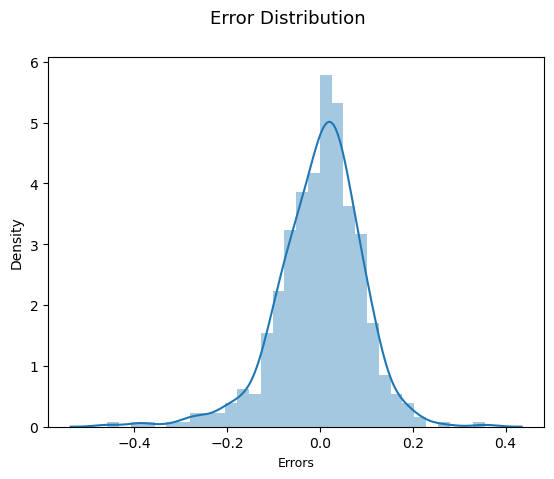

In [169]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Distribution', fontsize = 13)
plt.xlabel('Errors', fontsize = 9)
plt.show()

#### Observation:-
1. Error is normally distributed.
2. It's centered around 0.

## Predicting output variable

### Scaling test data

In [170]:
# We will perform all the operations on a copy of test dataset, so that we can use the 
# original dataset for future use

share_bike_test_copy = share_bike_test.copy(deep= True)

share_bike_test_copy[cols_to_rescale] = scaler.transform(share_bike_test_copy[cols_to_rescale])

# Creating y_test and X_test
y_test = share_bike_test_copy.pop('cnt')
X_test = share_bike_test_copy

In [171]:
X_test = X_test[X_train_new.columns]

X_test.describe()

,temp,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sept,weathersit_mist,weathersit_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.313293,0.254545,0.236364,0.086364,0.077273,0.104545,0.072727,0.086364,0.318182,0.027273
std,0.233187,0.159584,0.436599,0.425817,0.281541,0.267633,0.306665,0.260281,0.281541,0.466833,0.163248
min,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.402718,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
# Adding constant before predicting

X_test_sm = sm.add_constant(X_test)
y_test_pred = linear_model.predict(X_test_sm)

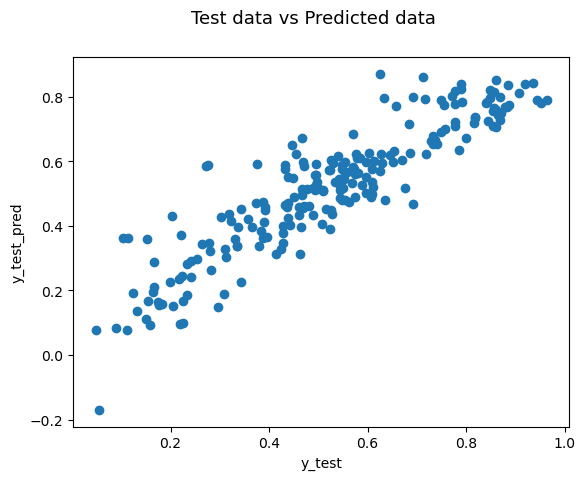

In [173]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Test data vs Predicted data', fontsize = 13)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_test_pred', fontsize = 10)
plt.show()

#### Observation
1. Predicted values are in a close range except for a few outliers such as the one at the bottom left.

In [174]:
r2_score_test = r2_score(y_test, y_test_pred)
print(r2_score_test)

0.8168625651669512


#### R-squared score of test data is good and is very close to the R-squared score calculated for the training data.

### Adjusted R squared Value for test data

In [175]:
num_rows = X_test.shape[0]

num_features = X_test.shape[1]

r2_adjusted = 1 - (1 - r2_score_test) * (num_rows - 1) / (num_rows - num_features - 1)

print(r2_adjusted)

0.8062459022780788


#### Observation:-
Adjusted R-squared score on test data is also good.

## Using RFE approach

We just built 18 models by eliminating features one by one on the basis of p-value and VIF. Now we will make use of Recursive Feature Elimination (RFE), to build our regression model.

In [176]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [177]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_mist', True, 1),
 ('weathersit_rain', True, 1)]

In [178]:
# Creating X_train for RFE

rfe_cols = X_train.columns[rfe.support_]

X_train_rfe = X_train[rfe_cols]

X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sept,weekday_sat,weekday_sun,weathersit_mist,weathersit_rain
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0


### 1st Model using RFE

In [179]:
# Creating Regression model

linear_model = createRegressionModel(X_train_rfe, y_train)
print(linear_model.summary())
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.11e-191
Time:                        11:26:00   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028     

,features,vif
2,workingday,50.68
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
13,weathersit_mist,1.57


#### Observation:-
1. VIF is very high for few features.
2. holiday has very high p-value.

We will revise our model by eliminating holiday

### 2nd Model using RFE & manual feature selection (dropping holiday)

In [180]:
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

linear_model = createRegressionModel(X_train_rfe, y_train)
print(linear_model.summary())
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          2.11e-191
Time:                        11:26:00   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042     

,features,vif
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_sat,4.91
5,season_spring,4.80
11,weekday_sun,4.76
7,season_winter,3.69
6,season_summer,3.04
12,weathersit_mist,2.31


#### Observation:-
1. vif has come down for workingday, weekday_sat and some other features.
2. There is a sharp increase in VIF of hum, temp.
3. There is no feature with p-value > 0.05.

Feature selection will be done on the basis of high vif. So we will eliminate workingday and revise our model.

### 3rd Model using RFE & manual feature selection (dropping workingday)

In [181]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

linear_model = createRegressionModel(X_train_rfe, y_train)
print(linear_model.summary())
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          4.02e-189
Time:                        11:26:00   Log-Likelihood:                 509.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     496   BIC:                            -931.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2804      0.035     

,features,vif
2,hum,28.24
1,temp,16.06
3,windspeed,4.68
4,season_spring,4.02
6,season_winter,3.34
5,season_summer,2.79
11,weathersit_mist,2.30
0,yr,2.08
7,mnth_jul,1.59
8,mnth_sept,1.38


#### Observation:-
1. 2 features have > 5 VIF : hum, temp
2. weekday_sat has high p-value.

I will drop weekday_sat and create another model.

### 4th Model using RFE & manual feature selection (dropping weekday_sat)

In [182]:
X_train_rfe = X_train_rfe.drop(['weekday_sat'], axis=1)

linear_model = createRegressionModel(X_train_rfe, y_train)
print(linear_model.summary())
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.9
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          5.65e-190
Time:                        11:26:01   Log-Likelihood:                 508.62
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     497   BIC:                            -936.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2839      0.035     

,features,vif
2,hum,28.23
1,temp,16.04
3,windspeed,4.65
4,season_spring,4.00
6,season_winter,3.33
5,season_summer,2.79
10,weathersit_mist,2.30
0,yr,2.08
7,mnth_jul,1.59
8,mnth_sept,1.38


#### Observation:-
1. VIF is > 5 for temp, hum.

We can drop hum as it has high VIF

### 5th Model using RFE & manual feature selection (dropping hum)

In [183]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

linear_model = createRegressionModel(X_train_rfe, y_train)
print(linear_model.summary())
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          3.37e-187
Time:                        11:26:01   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2034      0.030     

,features,vif
1,temp,5.14
2,windspeed,4.60
4,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_jul,1.59
9,weathersit_mist,1.55
7,mnth_sept,1.33
8,weekday_sun,1.17


### 6th Model using RFE & manual feature selection (dropping mnth_jul)

In [184]:
X_train_rfe = X_train_rfe.drop(['mnth_jul'], axis=1)

linear_model = createRegressionModel(X_train_rfe, y_train)
print(linear_model.summary())
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          5.70e-187
Time:                        11:26:01   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1956      0.030     

,features,vif
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.91
5,season_winter,1.64
8,weathersit_mist,1.55
6,mnth_sept,1.22
7,weekday_sun,1.17
9,weathersit_rain,1.08


#### Observation:-
1. Almost all the p-values are close to 0.
2. This model has high R-squared score of 0.81.
3. F-statistic is 217.6 which is quite good.
4. Prob (F-statistic) is 8.19e-175 which is nearly 0.

The model created using RFE is very similar to the model obtained earlier using manual elimination technique. We will perform Residual analysis and prediction using this model.

### RESIDUAL ANALYSIS

In [185]:
# Adding coefficient to X_train_rfe

X_train_rfe_sm = sm.add_constant(X_train_rfe)

y_train_rfe_pred = linear_model.predict(X_train_rfe_sm)

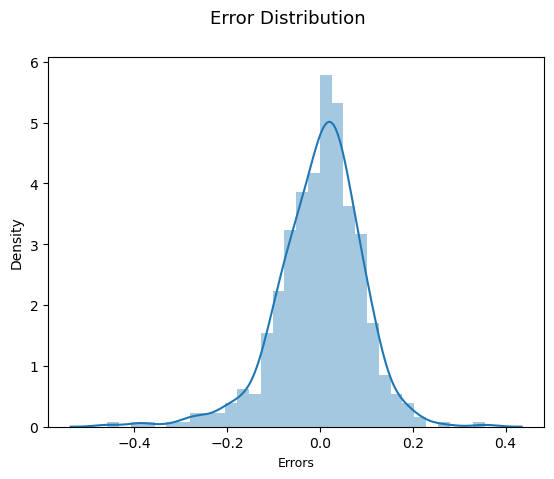

In [186]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Distribution', fontsize = 13)
plt.xlabel('Errors', fontsize = 9)
plt.show()

#### Observation:-
1. Error is normally distributed.
2. It's centered around 0.

### Predicting output variable

### Scaling test data

In [187]:
# We will once again create a copy of share_bike_test data and proceed with further operations.

share_bike_test_copy = share_bike_test.copy(deep= True)

share_bike_test_copy[cols_to_rescale] = scaler.transform(share_bike_test_copy[cols_to_rescale])

# Creating y_test and X_test
y_test = share_bike_test_copy.pop('cnt')
X_test = share_bike_test_copy

In [188]:
X_test = X_test[X_train_rfe.columns]
X_test.describe()

,temp,windspeed,season_spring,season_summer,season_winter,mnth_sept,weekday_sun,weathersit_mist,weathersit_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.313293,0.254545,0.263636,0.236364,0.086364,0.145455,0.318182,0.027273
std,0.233187,0.159584,0.436599,0.441609,0.425817,0.281541,0.353363,0.466833,0.163248
min,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.402718,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [189]:
# Adding constant before predicting

X_test_sm = sm.add_constant(X_test)
y_test_pred = linear_model.predict(X_test_sm)

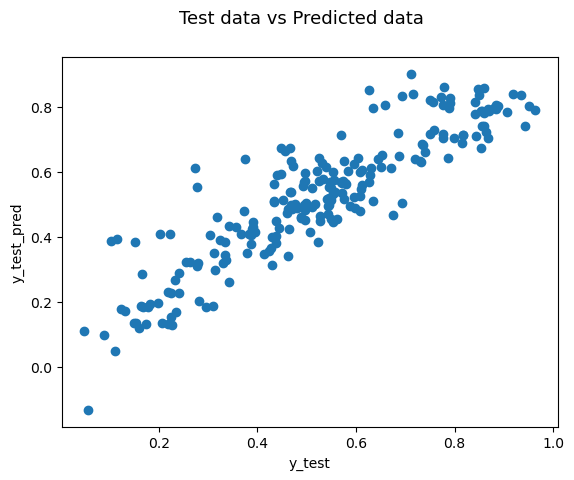

In [190]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Test data vs Predicted data', fontsize = 13)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_test_pred', fontsize = 10)
plt.show()

#### Observation

1. Majority of the Predicted values are within a close range.

### R-squared score calculation 

In [191]:
r2_score_test = r2_score(y_test, y_test_pred)
print(r2_score_test)

0.8031908103816627


#### Observation
1. Calculated r-squared score is 0.803 which is very good.

### Adjusted R squared Value for test data

In [192]:
num_rows = X_test.shape[0]

num_features = X_test.shape[1]

r2_adjusted = 1 - (1 - r2_score_test) * (num_rows - 1) / (num_rows - num_features - 1)

print(r2_adjusted)

0.7937741027444217


### Comparison of results

#### Comparing r-squared score for training data

manual model :- 0.834
rfe model :- 0.833
    
#### Comparing adjusted r-squared score for training data

manual model :- 0.830
rfe model :- 0.830
    
#### Comparing r-squared score for test data

manual model :- 0.816
rfe model :- 0.803
    
#### Comparing adjusted r-squared score for test data

manual model :- 0.806
rfe model :- 0.793
    
#### Comparing final features set

manual model :-     temp, windspeed, season_spring, season_winter, mnth_dec, mnth_jan, mnth_jul, mnth_nov
                    mnth_sept, weathersit_mist, weathersit_rain, yr

rfe model :-        temp, windspeed, season_spring, season_summer, season_winter, mnth_sept, weekday_sun
                    weathersit_mist, weathersit_rain, yr

### Recommendations for BoomBikes

1. Bike sharing business has major impact of these three top features:- temp, season_winter, yr. Coefficient of 0.479 & 0.4 for temp indicates that one unit increase in temp, improves bike rental count by 0.4 approx. Coefficient of 0.23 for yr indicates positive trend, and the bike rental business is likely to increase in year on year basis.

               

2. Besides, weathersit_clear, mnth_sept, season_summer also have positive impact on bike hiring. So the company must focus on staying ahead of the competition during these periods.

3. windspeed negatively impacts bike rental service, and one unit of increase in windspeed, impacts it by 0.15 units.
        
4. season_spring  has a negative coefficient. Company may plan to run promotions to boost the rental service.

#### Other recommendations

Since some seasons and weather situations (e.g. Mist, Cloudy, Heay Rain, Snow) are not conducive for the business, the company may think of using this downtime for staff training, bikes maintenance, overfall facilities upliftment, etc.